In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
1. #import lib
# Import libraries# Impor 
import os,cv2
import random
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras import callbacks

from keras.utils import np_utils

from keras import backend as K

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#2. Load data
#Define Datapath
data_path = "/content/gdrive/My Drive/Machine learing/Pre-process/CK+/CK+ 6 E "
data_dir_list = os.listdir(data_path)

"""img_rows=256
img_cols=256
num_channel=1

num_epoch=10"""

img_data_list=[]

nb_img=0
random.seed(10)
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    print("Tong cac anh trong ",dataset,"la: ",len(img_list))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(32,32))
        img_data_list.append(input_img_resize)
        nb_img+=1
print("Tong img: ",nb_img)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape


Loaded the images of dataset-anger

Tong cac anh trong  anger la:  135
Loaded the images of dataset-disgust

Tong cac anh trong  disgust la:  177
Loaded the images of dataset-fear

Tong cac anh trong  fear la:  75
Loaded the images of dataset-happy

Tong cac anh trong  happy la:  207
Loaded the images of dataset-sadness

Tong cac anh trong  sadness la:  83
Loaded the images of dataset-surprise

Tong cac anh trong  surprise la:  249
Tong img:  926


(926, 32, 32, 3)

In [0]:
#3. Define labels:
num_classes = 6

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
#= sh-1+so dau
labels[0:134]=0 #anger la:  135  0
labels[135:383]=5 #surprise la:  249 5
labels[384:466]=4 #sadness la:  83 4
labels[467:673]=3 #happy la:  207 3
labels[674:748]=2 #fear la:  75 2
labels[749:925]=1 #disgust la:  177 1


names = ['anger','surprise','sadness','happy','fear','disgust']

def getLabel(id):
    return ['anger','surprise','sadness','happy','fear','disgust'][id]

In [0]:
#4.Convert the class label to one-hot encoding
# convert class labels to on-hot encoding# conve 
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
random.seed(10)
x,y = shuffle(img_data,Y, random_state=2)
x,y = shuffle(img_data,Y, random_state=3)

# Split the dataset
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [0]:
print(x[0].shape)

(32, 32, 3)


In [0]:
#import tensorflow as tf
#from tensorflow.keras.layers import Convolution2D, Flatten, MaxPooling2D, Dropout, Dense, Input
from keras.layers import BatchNormalization,Convolution2D, Flatten, MaxPooling2D, Dropout, Dense, Input
from tensorflow.keras import activations

In [6]:
#5.CNN
num_classes = 6
#tensorflow.keras.
model = Sequential()
#add kernel_regularizer=l2(0.0005) neu overfitting
model.add(Convolution2D(32, (5, 5),strides=(1,1),input_shape=x[0].shape))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(2, (7,7),strides=(1,1),activation ="relu",
                padding="valid"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
#tf.
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.summary()


#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 2)           3138      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [0]:
def CNN():
    #5.CNN
  num_classes = 6
  #tensorflow.keras.
  model = Sequential()
  #add kernel_regularizer=l2(0.0005) neu overfitting
  model.add(Convolution2D(32, (5, 5),strides=(1,1),input_shape=x[0].shape))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Convolution2D(2, (7,7),strides=(1,1),activation ="relu",
                  padding="valid"))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256))
  model.add(Dropout(0.2))
  #tf.
  model.add(keras.layers.Dense(num_classes, activation='softmax'))
  model.summary()


  #Compile Model
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [0]:
filename='/content/gdrive/My Drive/Machine learing/Test/Final Pr_3/Result/model/model_train_new.csv'
filepath="/content/gdrive/My Drive/Machine learing/Test/Final Pr_3/Result/model/model_weight.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [0]:
#6. Run k-fold for trainning
def call_back():
  filename='/content/gdrive/My Drive/Machine learing/Test/Final Pr_3/Result/model/model_train_new.csv'
  filepath="/content/gdrive/My Drive/Machine learing/Test/Final Pr_3/Result/model/model_weight.hdf5"

  csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
  checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [csv_log,checkpoint]
  callbacks_list = [csv_log]

In [12]:
x=[]
x =[1,2]
print(x)
x=[]
print(x)

[1, 2]
[]


In [8]:
accuracy_trainning = []
mean=1
totally_acc = 0
n=0
k_fold = 8
#best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=k_fold, random_state=42, shuffle=True)
for train_index, test_index in cv.split(x):
    hist = []
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    n +=1
    print("fold: ",n)
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    hist = model.fit(x_train, y_train, batch_size=7, epochs=8,validation_data=(x_test, y_test), verbose=1,callbacks=callbacks_list)
    
    # Evaluating the model
    score = model.evaluate(x_test, y_test, verbose=0)
    score, accuracy = model.evaluate(x_test, y_test)
    print("Acurracy on validation data: ", accuracy)
    if n==1:
      totally_acc = accuracy
      #print(" Accuracy init: ",totally_acc)
    elif n == k_fold:
      mean = (totally_acc+ accuracy)/n
      print(" Mean Accurracy: ", mean)
    else:
      totally_acc += accuracy
      #print("Total acc: ",totally_acc)
   
      

fold:  1
Train on 810 samples, validate on 116 samples
Epoch 1/8
810/810 [==============================] - 2s 2ms/step - loss: 1.7293 - accuracy: 0.2383 - val_loss: 1.6771 - val_accuracy: 0.2586
Epoch 2/8
810/810 [==============================] - 0s 585us/step - loss: 1.5883 - accuracy: 0.3210 - val_loss: 1.4244 - val_accuracy: 0.3190
Epoch 3/8
810/810 [==============================] - 0s 582us/step - loss: 1.2442 - accuracy: 0.4568 - val_loss: 1.2158 - val_accuracy: 0.5086
Epoch 4/8
810/810 [==============================] - 0s 587us/step - loss: 1.0957 - accuracy: 0.5062 - val_loss: 1.1503 - val_accuracy: 0.5259
Epoch 5/8
810/810 [==============================] - 0s 581us/step - loss: 1.0327 - accuracy: 0.5444 - val_loss: 1.1235 - val_accuracy: 0.5259
Epoch 6/8
810/810 [==============================] - 0s 583us/step - loss: 0.9732 - accuracy: 0.5728 - val_loss: 1.0562 - val_accuracy: 0.5690
Epoch 7/8
810/810 [==============================] - 0s 586us/step - loss: 0.9261 - accur

In [0]:
#7.save model
model.save('CK+Git_JAFFE_test.h5')

In [0]:
import shutil
shutil.copy('CK+Git_JAFFE_test.h5', '/content/gdrive/My Drive/Machine learing/Test/Final Pr_3/Result/model') 

'/content/gdrive/My Drive/Machine learing/Test/Final Pr_3/Result/model/CK+Git_JAFFE_test.h5'

In [0]:
import tensorflow as tf
reloaded_model = tf.keras.models.load_model('/content/gdrive/My Drive/Machine learing/Test/Final Pr_3/Result/model/CK+Git_JAFFE_test.h5')

In [0]:
#7. Predict  chi tiet cua data 6E Train,test, CK+  8-fold, epochs 2000
#7. Draw matrix result
#7.1.Luu test samples da dung truoc do
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

np.save('modXtest',x_test)
np.save('modytest',y_test)
#7.2.Load du lieu 
truey=[]
predy=[]
x= np.load('./modXtest.npy')
y= np.load('./modytest.npy')
ypredict = reloaded_model.predict(x)
results_reload = reloaded_model.evaluate(x, y)
#print("test loss, test accuracy", results_reload)

y_result = np.argmax(ypredict, axis=1) 
print("y result shape:", len(y_result))
print("y result: ", y_result)
y_label = [np.argmax(x) for x in y]
print("y_label: ", y_label)
predy = y_result
true_y = y_label 

np.save('truey', y_label)
np.save('predy', y_result)

8/8 [==============================] - 0s 4ms/step - loss: 0.6107 - accuracy: 0.7446
test loss, test accuracy [0.6106612682342529, 0.7445887327194214]


In [0]:
import numpy as np
print("x shape: ", x.shape)
print("x 0: ", x[0].shape)
# print("y predict: ", ypredict)
print("y predict shape: ", ypredict.shape)
#  lay label
y_result = np.argmax(ypredict, axis=1) 
print("y result shape:", len(y_result))
print("y result: ", y_result)
y_label = [np.argmax(x) for x in y]
print("y_label: ", y_label)
predy = y_result
true_y = y_label 

np.save('truey', y_label)
np.save('predy', y_result)

x shape:  (231, 32, 32, 3)
x 0:  (32, 32, 3)
y predict shape:  (231, 6)
y result shape: 231
y result:  [0 5 3 0 1 1 2 3 5 5 5 3 5 3 2 4 3 5 5 1 5 1 3 5 5 4 5 3 5 3 0 2 3 1 1 1 3
 1 3 1 5 2 5 5 3 3 3 1 5 0 2 1 1 4 0 5 3 1 3 5 0 3 3 3 1 1 1 1 5 3 1 0 5 1
 3 5 1 5 3 5 5 5 1 3 2 1 2 0 3 1 2 1 1 0 0 5 5 0 3 1 3 1 5 1 3 3 5 5 1 3 3
 2 1 5 1 3 5 5 1 1 1 0 3 3 3 1 3 3 3 3 1 5 1 0 5 1 5 1 5 0 3 0 1 0 3 3 3 1
 1 1 5 1 0 2 2 5 1 3 1 2 2 1 5 5 1 3 1 5 0 1 3 1 1 3 5 3 5 0 0 3 2 0 3 1 5
 5 5 5 5 0 5 3 3 5 3 1 3 1 0 1 4 1 5 1 3 3 0 5 1 1 1 5 3 5 5 5 5 5 5 3 5 1
 5 5 5 2 3 2 3 5 5]
y_label:  [0, 5, 5, 0, 1, 1, 3, 3, 5, 4, 4, 1, 5, 4, 2, 4, 3, 5, 5, 1, 5, 1, 3, 5, 5, 5, 1, 2, 5, 3, 0, 3, 3, 2, 1, 1, 3, 1, 3, 1, 4, 2, 4, 5, 3, 1, 3, 1, 5, 0, 2, 1, 1, 5, 0, 4, 3, 1, 1, 1, 0, 3, 3, 2, 1, 0, 1, 1, 5, 2, 1, 0, 4, 1, 3, 4, 1, 5, 3, 5, 5, 3, 1, 2, 2, 1, 2, 0, 2, 1, 3, 1, 1, 0, 0, 5, 5, 0, 3, 1, 3, 1, 5, 1, 2, 2, 4, 5, 1, 3, 3, 3, 1, 5, 1, 3, 5, 5, 1, 1, 0, 0, 3, 3, 3, 1, 5, 4, 3, 2, 1, 5, 1, 1, 5, 1, 5, 1, 5,

[[23  4  0  0  0  0]
 [ 1 57  0  4  0  3]
 [ 0  1  8 12  0  0]
 [ 0  0  8 38  0  2]
 [ 0  0  0  2  2 17]
 [ 0  0  0  3  2 44]]


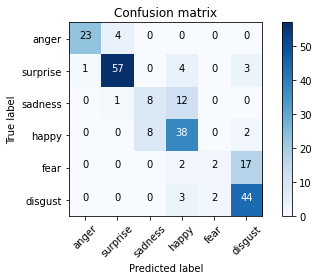

In [0]:
y_true = np.load('./truey.npy')
y_pred = np.load('./predy.npy')
cm = confusion_matrix(y_true, y_pred)
labels = ['anger', 'surprise', 'sadness', 'happy', 'fear', 'disgust']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [0]:
#8. 6 E 8-fold: JAFFE
# Load data JAFFE
#Define Datapath
test_path = '/content/gdrive/My Drive/Machine learing/Pre-process/JAFFE_6E'
test_dir_list = os.listdir(test_path)
img_test_list=[]
random.seed(10)
for dataset in test_dir_list:
    img_list=os.listdir(test_path+'/'+ dataset)
    print ('Load dataset-'+'{}\n'.format(dataset))
    print("Tong cac anh trong ",dataset,"la: ",len(img_list))
    for img in img_list:
        input_img=cv2.imread(test_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)        
        input_img_resize=cv2.resize(input_img,(32,32))
        img_test_list.append(input_img_resize)
        
Jaffe_test_data = np.array(img_test_list)
Jaffe_test_data = Jaffe_test_data.astype('float32')
Jaffe_test_data = Jaffe_test_data/255


Load dataset-surprise

Tong cac anh trong  surprise la:  30
Load dataset-disgust

Tong cac anh trong  disgust la:  29
Load dataset-anger

Tong cac anh trong  anger la:  30
Load dataset-fear

Tong cac anh trong  fear la:  32
Load dataset-sadness

Tong cac anh trong  sadness la:  31
Load dataset-happiness

Tong cac anh trong  happiness la:  31


In [0]:
#9. Parameters

#define number of classes

num_of_samples = Jaffe_test_data.shape[0]
labels_test = np.ones((num_of_samples,),dtype='int64')

labels_test[0:29]=1 #30 #anger la:  30
labels_test[30:58]=5 #29 # disgust la:  29
labels_test[59:90]=0 #32 #fear la:  32
labels_test[121:151]=4 #30 #sadness la:  31
labels_test[152:182]=2 #31 #happiness la:  31
labels_test[183:212]=3 #30 #surprise la:  30


# convert class labels to on-hot encoding# conve 
JF_labels = np_utils.to_categorical(labels_test, num_classes)
random.seed(10)
#Shuffle the dataset
Jaffe_data,Jaffe_labels = shuffle(Jaffe_test_data,JF_labels, random_state=2)

In [0]:
print(Jaffe_data.shape)
print(Jaffe_labels.shape)

(183, 128, 128, 3)
(183, 6)


In [0]:
#names = ['anger','surprise','sadness','happy','fear','disgust']
#10. Draw matrix result JAFFE test
#10.1.Luu test samples da dung truoc do
np.save('modXtest_jf',Jaffe_data)
np.save('modytest_jf',Jaffe_labels)
#7.2.Load du lieu 
truey_jf=[]
predy_jf=[]
x_jf= np.load('./modXtest_jf.npy')
y_jf= np.load('./modytest_jf.npy')
ypredict_jf = reloaded_model.predict(x_jf)
results_reload = reloaded_model.evaluate(x_jf, y_jf)
#print("test loss, test accuracy", results_reload)

y_result_jf = np.argmax(ypredict_jf, axis=1) 
print("y result shape:", len(y_result_jf))
print("y result: ", y_result_jf)
y_label_jf = [np.argmax(x_jf) for x_jf in y_jf]
print("y_label: ", y_label_jf)
predy_jf = y_result_jf
true_y_jf = y_label_jf 

np.save('truey', y_label_jf)
np.save('predy_jf', y_result_jf)

6/6 [==============================] - 0s 3ms/step - loss: 13.9960 - accuracy: 0.1858
y result shape: 183
y result:  [4 1 5 1 5 1 5 5 1 1 1 1 1 1 1 4 2 4 1 1 1 5 5 5 5 5 5 5 1 5 1 1 5 4 1 1 4
 1 4 1 5 5 5 1 1 3 1 5 1 5 5 5 4 5 5 5 5 4 1 1 1 1 1 1 2 1 5 5 5 1 3 1 4 4
 5 5 3 1 4 4 1 1 1 5 1 5 0 3 1 5 4 1 5 5 1 4 1 1 4 1 1 1 4 5 1 1 4 1 1 5 1
 1 1 1 1 4 4 1 5 4 5 5 1 5 5 5 1 5 5 1 5 5 1 1 1 4 5 1 5 1 1 1 1 1 1 5 5 5
 1 1 1 1 1 5 1 5 3 5 1 5 5 1 1 1 1 5 4 5 1 5 1 1 3 5 1 5 5 1 1 5 5 5 1]
y_label:  [1, 2, 1, 4, 1, 5, 2, 1, 4, 5, 5, 2, 0, 1, 2, 1, 2, 1, 1, 5, 2, 1, 1, 0, 1, 4, 0, 1, 1, 5, 5, 2, 0, 1, 0, 1, 1, 4, 1, 2, 1, 1, 5, 2, 4, 5, 1, 1, 4, 4, 1, 4, 1, 1, 4, 1, 5, 0, 0, 1, 4, 2, 2, 2, 2, 2, 2, 4, 0, 5, 2, 1, 0, 1, 1, 4, 4, 2, 1, 4, 4, 4, 0, 5, 4, 1, 0, 2, 1, 1, 1, 1, 2, 1, 5, 1, 4, 1, 1, 2, 0, 4, 4, 4, 2, 0, 1, 0, 1, 1, 4, 1, 0, 0, 4, 0, 1, 0, 5, 1, 4, 0, 0, 1, 1, 1, 0, 5, 5, 0, 1, 5, 2, 1, 0, 1, 1, 0, 1, 4, 2, 4, 5, 5, 2, 4, 5, 5, 0, 2, 4, 2, 5, 0, 0, 0, 2, 1, 5, 5, 1, 5, 1, 1, 1, 5, 1,

In [0]:
import numpy as np
print("x shape: ", x_jf.shape)
print("x_jf 0: ", x_jf[0].shape)
# print("y predict: ", ypredict)
print("y predict shape: ", ypredict_jf.shape)
#  lay label
y_result_jf = np.argmax(ypredict_jf, axis=1) 
print("y result shape:", len(y_result_jf))
print("y result: ", y_result_jf)
y_label_jf = [np.argmax(x_jf) for x_jf in y_jf]
print("y_label: ", y_label_jf)
predy_jf = y_result_jf
true_y_jf = y_label_jf

np.save('truey_jf', y_label_jf)
np.save('predy_jf', y_result_jf)

x shape:  (183, 32, 32, 3)
x_jf 0:  (32, 32, 3)
y predict shape:  (183, 6)
y result shape: 183
y result:  [4 1 5 1 5 1 5 5 1 1 1 1 1 1 1 4 2 4 1 1 1 5 5 5 5 5 5 5 1 5 1 1 5 4 1 1 4
 1 4 1 5 5 5 1 1 3 1 5 1 5 5 5 4 5 5 5 5 4 1 1 1 1 1 1 2 1 5 5 5 1 3 1 4 4
 5 5 3 1 4 4 1 1 1 5 1 5 0 3 1 5 4 1 5 5 1 4 1 1 4 1 1 1 4 5 1 1 4 1 1 5 1
 1 1 1 1 4 4 1 5 4 5 5 1 5 5 5 1 5 5 1 5 5 1 1 1 4 5 1 5 1 1 1 1 1 1 5 5 5
 1 1 1 1 1 5 1 5 3 5 1 5 5 1 1 1 1 5 4 5 1 5 1 1 3 5 1 5 5 1 1 5 5 5 1]
y_label:  [1, 2, 1, 4, 1, 5, 2, 1, 4, 5, 5, 2, 0, 1, 2, 1, 2, 1, 1, 5, 2, 1, 1, 0, 1, 4, 0, 1, 1, 5, 5, 2, 0, 1, 0, 1, 1, 4, 1, 2, 1, 1, 5, 2, 4, 5, 1, 1, 4, 4, 1, 4, 1, 1, 4, 1, 5, 0, 0, 1, 4, 2, 2, 2, 2, 2, 2, 4, 0, 5, 2, 1, 0, 1, 1, 4, 4, 2, 1, 4, 4, 4, 0, 5, 4, 1, 0, 2, 1, 1, 1, 1, 2, 1, 5, 1, 4, 1, 1, 2, 0, 4, 4, 4, 2, 0, 1, 0, 1, 1, 4, 1, 0, 0, 4, 0, 1, 0, 5, 1, 4, 0, 0, 1, 1, 1, 0, 5, 5, 0, 1, 5, 2, 1, 0, 1, 1, 0, 1, 4, 2, 4, 5, 5, 2, 4, 5, 5, 0, 2, 4, 2, 5, 0, 0, 0, 2, 1, 5, 5, 1, 5, 1, 1, 1, 5, 1, 4, 4, 5, 0

[[ 1 19  0  0  3  8]
 [ 0 16  0  0 17 31]
 [ 0 21  2  4  0  3]
 [ 0  0  0  0  0  0]
 [ 0 17  0  1  2 10]
 [ 0 14  0  1  0 13]]


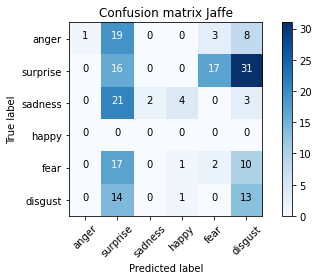

In [0]:
y_true_jf = np.load('./truey_jf.npy')
y_pred_jf = np.load('./predy_jf.npy')
cm = confusion_matrix(y_true_jf, y_pred_jf)
labels = ['anger', 'surprise', 'sadness', 'happy', 'fear', 'disgust']
title='Confusion matrix Jaffe'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()